In [1]:
!pip3 install pymongo[srv]

In [1]:
from fermat_helpers.dbConnector import DBConnector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style='ticks', palette='RdBu')
%matplotlib inline

## Chargement du jeu de données

In [3]:
db = DBConnector()

In [5]:

df = db.get_base_data()
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,brands
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,I feel so LUCKY to have found this used (phone...,1.0,NaN
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,"nice phone, nice up grade from my pantach revu...",0.0,NaN
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5.0,Very pleased,0.0,NaN
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,It works good but it goes slow sometimes but i...,0.0,NaN
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4.0,Great phone to replace my lost phone. The only...,0.0,NaN


## Chargement du jeu de données

#### Description des attributs :

> Product Name - nom du produit, par exemple "Apple iPhone 5 16GB Factory unlocked GSM Cell Phone - White".

> Brand Name - nom de la marque.

> Price - Prix du produit

> Rating - Note donnée par l'utilisateur, entre 1 et 5

> Reviews  - Critique du produit donnée par l'utilisateur.

> Review Votes - Nombre de commentaires sur l'avis.


In [6]:
df.shape

(413841, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413841 entries, 0 to 413840
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    359036 non-null  object 
 2   Price         406923 non-null  float64
 3   Rating        413840 non-null  float64
 4   Reviews       413788 non-null  object 
 5   Review Votes  401299 non-null  float64
 6   brands        1 non-null       object 
dtypes: float64(3), object(4)
memory usage: 22.1+ MB


In [8]:
df.isnull().sum()

Product Name         1
Brand Name       54805
Price             6918
Rating               1
Reviews             53
Review Votes     12542
brands          413840
dtype: int64

In [9]:
df['Price'] = df['Price'].fillna(0)
df['Review Votes'] = df['Review Votes'].fillna(0)

In [10]:
df.describe()

,Price,Rating,Review Votes
count,413841.000000,413840.000000,413841.000000
mean,222.997292,3.757754,1.481390
std,315.554520,1.581047,9.230018
min,0.000000,1.000000,0.000000
25%,59.990000,2.000000,0.000000
50%,120.000000,5.000000,0.000000
75%,233.430000,5.000000,1.000000
max,2598.000000,5.000000,487.000000


In [11]:
brandName = df['Brand Name'].str.upper()
brandlist = df["Brand Name"].unique()

In [17]:
# create a collection with list of brands
db.change_collection("BRAND_LIST")
db.insert({"brands": brandlist.tolist()})

In [18]:
res = list(db.get_all())[0]["brands"]

In [23]:
import re
def remove_special_characters_from_brand_name(text):
    """
    Remove special characters from a text.
    """
    # remove special characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # remove multiple spaces
    text = re.sub(r"\s+", " ", text)
    # remove leading and trailing spaces
    text = text.strip()
    # return the text
    return text

In [22]:
for collection_name in brandlist.tolist():
    if db.is_collection_exists(collection_name):
        db.drop_collection(collection_name)

In [24]:
for brandname in brandlist.tolist():
    if type(brandname) != str :
        continue
    brand = remove_special_characters_from_brand_name(brandname)
    db.create_collection(brand)
    db.change_collection(brand)
    print(brandname)
    # filter data for the current brandname
    brand_df = df[df['Brand Name'] == brandname]
    # insert data into collection
    db.insert_many(brand_df.to_dict('records'))
    print("taille elements inserés", brand_df.shape)

Samsung
taille elements inserés (3198, 7)
Nokia
taille elements inserés (160, 7)
HTM
taille elements inserés (48, 7)
Jethro
taille elements inserés (234, 7)
e passion
taille elements inserés (50, 7)
Cedar Tree Technologies
taille elements inserés (8, 7)
Indigi
taille elements inserés (9, 7)
Phone Baby
taille elements inserés (6, 7)
OtterBox
taille elements inserés (60, 7)
Lenovo
taille elements inserés (36, 7)
Huawei
taille elements inserés (1238, 7)
JUNING
taille elements inserés (580, 7)
Elephone
taille elements inserés (44, 7)
Plum
taille elements inserés (144, 7)
VKworld
taille elements inserés (88, 7)
NOKIA
taille elements inserés (6, 7)
Ulefone
taille elements inserés (224, 7)
Jiuhe
taille elements inserés (52, 7)
inDigi
taille elements inserés (73, 7)
Acer
taille elements inserés (44, 7)
Aeku
taille elements inserés (4, 7)
AKUA
taille elements inserés (8, 7)
Alcatel
taille elements inserés (2823, 7)
TCL Mobile
taille elements inserés (8, 7)
LG
taille elements inserés (2019, 7)
a

In [68]:
# for each brand in brandlist create a collection with all data
# for brand in brandlist:
df_brand = df[==res["brands"][0]]
df_brand.head()

TypeError: expected string or bytes-like object

In [10]:
reviews = df['Reviews']
brandName = df['Brand Name'].str.upper()
brandList = list(set(brandName))
uniqueProducts = list(set(df['Product Name']))
uniqueRating = list(set(df['Rating']))

productCount = []
for prod in uniqueProducts:
    productCount.append(len(df.loc[df['Product Name'] == prod]))

Nombre d'évaluations, de marque de produits et enfin de produits vendus

In [11]:
print(f"Nombre total de reviews: {len(reviews)}")
print(f"Nombre total de marque: {len(brandName.value_counts())}")
print(f"Nombre total de produits: {len(productCount)}")

Nombre total de reviews: 413840
Nombre total de marque: 330
Nombre total de produits: 4410


Nombre de produits par marque

In [16]:
print(f"Nombre de produits par marque:\n{'--' * 25}\n{brandName.value_counts()}")

Nombre de produits par marque:
--------------------------------------------------
SAMSUNG                                   68720
BLU                                       63256
APPLE                                     58187
LG                                        22423
BLACKBERRY                                17929
                                          ...  
DANGER INC.                                   1
BLACKBERRY (RIM)                              1
CONQUEST S8 PRO 3GB SMARTPHONE (BLACK)        1
SSIONY                                        1
M-HORSE                                       1
Name: Brand Name, Length: 330, dtype: int64


Les 20 marques les plus présents

<AxesSubplot: >

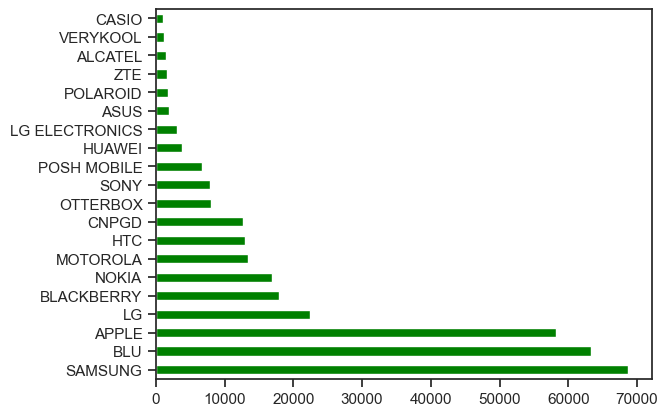

In [17]:
brandName.value_counts()[:20].plot(kind="barh", color="green")

In [18]:
pivot = pd.pivot_table(df,
                       values=['Rating', 'Review Votes'],
                       index=['Brand Name'],
                       columns=[],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std],
                       margins=True).fillna('')
pivot.head(10)

sum                   mean               \
                       Rating Review Votes    Rating Review Votes   
Brand Name                                                          
AKUA                       20          0.0  5.000000     0.000000   
AMM Global Enterprises     44          1.0  4.888889     0.111111   
ARGOM TECH                  6          0.0  3.000000     0.000000   
ASUS                     2165        838.0  4.482402     1.734990   
ASUS Computers           2896        831.0  4.027816     1.155772   
AT&T                        5          0.0  5.000000     0.000000   
ATT                       160         25.0  3.636364     0.568182   
Acer                       68         27.0  3.090909     1.227273   
Aeku                       10          8.0  5.000000     4.000000   
AeroAntenna                 5          0.0  5.000000     0.000000   

                       count_nonzero                    std               
                              Rating Review Votes    Rating Review Votes  
Brand Name                                                                
AKUA                               4            0       0.0          0.0  
AMM Global Enterprises             9            1  0.333333     0.333333  
ARGOM TECH                         2            0  2.828427          0.0  
ASUS                             483          185  1.070735     4.754574  
ASUS Computers                   719          228  1.386085     6.634777  
AT&T                               1            0                         
ATT                               44           17  1.792632     0.974028  
Acer                              22           14  1.715728     1.377777  
Aeku                               2            1       0.0     5.656854  
AeroAntenna                        1            0

Les meilleurs marques selon les évaluations

In [19]:
bestbrand = (df[df['Rating'] > 3].set_index('Brand Name').groupby(level=0)['Reviews'].agg(['count'])).sort_values(
    ['count'], ascending=False)[:10]
bestbrand

,count
Brand Name,
Samsung,48133
BLU,43076
Apple,42052
LG,15575
Nokia,11592
BlackBerry,11214
Motorola,9210
HTC,7510
OtterBox,6729


In [20]:
bestbrand = bestbrand.reset_index()

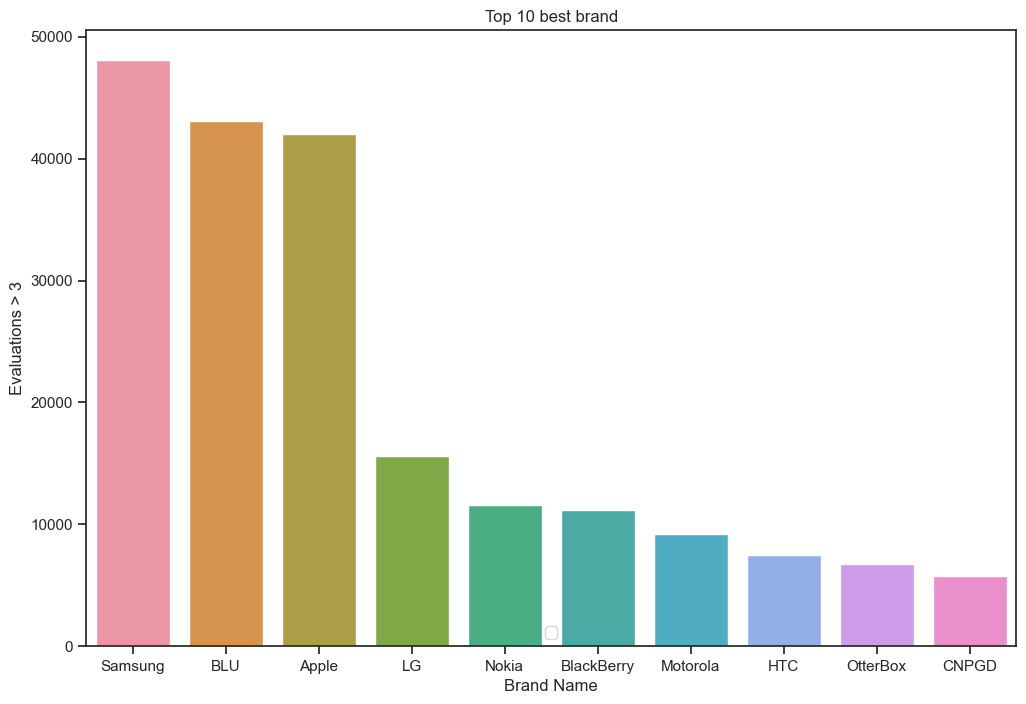

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(bestbrand, x="Brand Name", y='count', hue=bestbrand.index, dodge=False)
plt.legend([])
plt.ylabel('Evaluations > 3')
plt.title('Top 10 best brand');

Comment se présentent les évaluations moyennes des 20 premières marques ?

In [22]:
# extraire les données des 20 marques les plus présents
pivot2 = pd.pivot_table(df,
                        values=['Rating', 'Review Votes'],
                        index=['Brand Name'],
                        columns=[],
                        aggfunc=[np.sum, np.mean, np.count_nonzero, np.std],
                        margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna(
    '')
top20brands = pivot2.reindex().head(n=21)
top20brands

sum                   mean              count_nonzero  \
                 Rating Review Votes    Rating Review Votes        Rating   
Brand Name                                                                  
All             1330128       499722  3.814873     1.433228        348669   
Samsung          260513        97903  3.962356     1.489087         65747   
BLU              239853        58430  3.792262     0.923824         63248   
Apple            228346       112280  3.924415     1.929674         58186   
LG                86114        23070  3.841460     1.029130         22417   
BlackBerry        63126        21114  3.741465     1.251422         16872   
Nokia             64187        25964  3.819291     1.544924         16806   
Motorola          51157        23107  3.812849     1.722218         13417   
HTC               44094        12803  3.465420     1.006209         12724   
CNPGD             39176        20151  3.106002     1.597637         12613   
OtterBox          35022         2276  4.383778     0.284892          7989   
Sony              30590        12704  3.907767     1.622892          7828   
Posh Mobile       24570        12640  3.631929     1.868441          6765   
Huawei            14280         8552  4.294737     2.572030          3325   
LG Electronics    12635         2484  4.069243     0.800000          3105   
samsung            9855         2882  4.053887     1.185520          2431   
Polaroid           5152         2395  2.979757     1.385194          1729   
ZTE                6831         5698  4.092870     3.414020          1669   
Alcatel            5721         3174  4.045969     2.244696          1414   
Asus               5109         1715  3.858761     1.295317          1324   
verykool           4192         1565  3.626298     1.353806          1156   

                                  std               
               Review Votes    Rating Review Votes  
Brand Name                                          
All                  102770  1.545507     9.056848  
Samsung               18602  1.485313     9.783997  
BLU                   15985  1.502263     5.439966  
Apple                 18388   1.57606    13.010956  
LG                     5912  1.534323     5.013116  
BlackBerry             4058  1.599935      7.64211  
Nokia                  5530  1.490946     7.745235  
Motorola               4392  1.524914    15.037728  
HTC                    3184  1.660243     5.437551  
CNPGD                  3502  1.618294     8.857163  
OtterBox                743  1.164561     2.602952  
Sony                   2628  1.463032     5.616745  
Posh Mobile            2805  1.546897     6.987897  
Huawei                 1549  1.278014     12.45333  
LG Electronics          780  1.444429      3.38683  
samsung                 696  1.480454     6.971822  
Polaroid                846  1.658363     3.344379  
ZTE                     909  1.367796    17.161857  
Alcatel                 777  1.364293     8.006956  
Asus                    439  1.538272     7.077881  
verykool                437  1.520583     4.317516

In [ ]:
top20 = top20brands.index.to_list()[1:]

In [ ]:
df_20 = df.loc[df["Brand Name"].isin(top20)]
df_20["Brand Name"].value_counts()

In [ ]:
df_20.info()

In [ ]:
# creation d'une table pivot
pt = pd.pivot_table(df_20,
                    values=['Rating'],
                    index=['Brand Name'],
                    columns=[],
                    aggfunc=[np.mean, np.std],
                    fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False)

In [ ]:
pt

In [ ]:
# affichage
plt.subplots(figsize=(18, 10))
plt.title("moyenne et ecart types des evaluations pour les 20 premiers produits")
sns.heatmap(pt.T, fmt="f", linewidths=0.5, xticklabels=True, yticklabels=True)
plt.show()

Voyons a présent les produits les mieux évalués par marques

In [1]:
def get_most_product(brand, top_k=10):
    brnd_df = df_20.loc[df_20["Brand Name"].isin([brand])]
    p = pd.pivot_table(brnd_df, index=["Product Name"], values=["Rating", "Review Votes"], columns=[],
                       aggfunc=[np.sum, np.mean, np.count_nonzero], margins=True, fill_value=0).sort_values(
        by=("count_nonzero", "Rating"), ascending=False).fillna("")
    top20_prods = p.index.to_list()[:top_k]
    try:
        aa = brnd_df[brnd_df['Product Name'].isin(top20_prods)]
        g = sns.catplot(y='Product Name',
                        x='Rating',
                        data=aa,
                        saturation=1,
                        kind="bar",
                        errorbar=None,
                        aspect=4,
                        linewidth=1)
        locs, labels = plt.xticks()
        plt.title(f"Les {top_k} produits les plus évalués pour la marque {brand}")
        plt.setp(labels, rotation=90)
        plt.show()
    except:
        print("Error with data")

In [ ]:
for brand in top20[:3]:
    get_most_product(brand)

Voyons également les produits les moins évalués par marques

In [ ]:
def get_low_rating_product(brand, top_k=10):
    brnd_df = df_20.loc[df_20["Brand Name"].isin([brand])]
    p = pd.pivot_table(brnd_df, index=["Product Name"], values=["Rating", "Review Votes"], columns=[],
                       aggfunc=[np.sum, np.mean, np.count_nonzero], margins=True, fill_value=0).sort_values(
        by=("count_nonzero", "Rating"), ascending=True).fillna("")
    top20_prods = p.index.to_list()[:top_k]
    try:
        aa = brnd_df[brnd_df['Product Name'].isin(top20_prods)]
        g = sns.catplot(y='Product Name',
                        x='Rating',
                        data=aa,
                        saturation=1,
                        kind="bar",
                        errorbar=None,
                        aspect=4,
                        linewidth=1)
        locs, labels = plt.xticks()
        plt.title(f"Les {top_k} produits les moins évalués pour la marque {brand}")
        plt.setp(labels, rotation=90)
        plt.show()
    except:
        print("Error with data")

In [ ]:
for brand in top20[:3]:
    get_low_rating_product(brand)

Cette fois ci regardons les meilleurs produits (rating>=3) en fonction :

- du prix (bas prix)

In [ ]:
# Les 10 produits les moins cher
low_price_df = (df[(df['Rating'] >= 3) & (df['Price'] < 300)].set_index('Product Name').groupby(level=0)['Price'].agg(
    ['count'])).sort_values(['count'], ascending=False)[:10]

# regrouper par produits moins cher
grouped = df.set_index('Product Name').loc[low_price_df.index].groupby(level=0)

# recupère les prix séries
prix_prod = pd.Series(index=low_price_df.index, dtype=float)
for name, group in grouped:
    prix_prod.loc[name] = group.Price.iloc[0]

low_price_df['Price'] = prix_prod
low_price_df.reset_index(inplace=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=low_price_df,
            palette=sns.color_palette("cubehelix", 12))
plt.ylim(750, )
plt.ylabel('Nombre d\'évaluations >= 3')
plt.title('Produits très évalués et en dessous de $300');
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

- très cher (>700)

In [ ]:
high_price_df = (df[(df['Rating'] > 3) & (df['Price'] > 900)].set_index('Product Name').groupby(level=0)['Price'].
                 agg(['count'])).sort_values(['count'], ascending=False)[:10]

grouped = df.set_index('Product Name').loc[high_price_df.index].groupby(level=0)

price = pd.Series(index=high_price_df.index, dtype=float)
for name, group in grouped:
    price.loc[name] = group.Price.iloc[0]

high_price_df['Price'] = price
high_price_df.reset_index(inplace=True)

plt.figure(figsize=(8, 8))
sns.barplot(x='Price', y='count', dodge=False, hue='Product Name', data=high_price_df,
            palette=sns.color_palette("cubehelix", 12))
plt.ylabel('Nombre d\'évaluations')
plt.title('Meilleurs produits évalués et au dessus de $700')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Distribution du prix par rapport a l'évaluation

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="Rating", y="Price", data=df)
plt.title("Distribution du prix par rapport a l'évaluation")

En gros le rating n'a pas trop d'impact sur l'évaluations, la moyenne du prix est la même pour tous les niveaux d'évaluations même si on observe quelques valeurs abbérantes pour 5 et 1. Etant donnée la forme des violons au niveau de la médiane on peut en déduire que le prix n'a pas un impact énorme

Distributions des évaluations par catégories

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Rating"].value_counts()[k]} observations)' for k in df['Rating'].value_counts().keys()]
sizes = dict(df['Rating'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Distributions des évaluations par catégories", pad=40, fontweight='bold', fontsize=15)
plt.show();

- 23,5 % des avis sont négatifs (rating de 1 ou 2)
- 66,5 % des avis sont positifs (rating de 3 a 5)
On pourrait conclure que la plupart des clients sont satisfaits de leur produit